In [9]:
# Iplementando el modelo de Ising en 1D y 2D

import numpy as np
import random
import math
import matplotlib.pyplot as plt

def Ising_interaction(n, oneD=True):
    if oneD:
        W = np.zeros((n, n))
        np.fill_diagonal(W[1:], 1)
        np.fill_diagonal(W[:, 1:], 1)
    else:
        W = np.zeros((n * n, n * n))
        for i in range(n):
            for j in range(n):
                idx = i * n + j
                if i > 0: W[idx, (i - 1) * n + j] = 1
                if i < n - 1: W[idx, (i + 1) * n + j] = 1
                if j > 0: W[idx, i * n + (j - 1)] = 1
                if j < n - 1: W[idx, i * n + (j + 1)] = 1
    return W

def initialize_spins(n, oneD, num_spins=50):
    S_in = np.zeros(n) if oneD else np.zeros(n * n)
    indices = np.arange(len(S_in))
    np.random.shuffle(indices)
    indices_ = indices[num_spins:]
    S_in[indices_] = 1
    return np.where(S_in == 0, -1, 1)

def Ising(n, T, oneD=True):
    S_in = initialize_spins(n, oneD)
    W = Ising_interaction(n, oneD)
    H0 = -0.5 * S_in @ W @ S_in.T

    S_prom = []
    T_tot = []
    indices = np.arange(len(S_in))

    while T > 0:
        T_tot.append(T)
        S_prom.append(np.mean(S_in))
        for i in indices:
            spin = S_in[i]
            S_in[i] = -spin
            H1 = -0.5 * S_in @ W @ S_in.T
            if H1 - H0 <= 0:
                H0 = H1
            else:
                prob = math.exp(-(H1 - H0) / T)
                if random.random() > prob:
                    S_in[i] = spin
                else:
                    H0 = H1
        T -= 0.1 if oneD else 0.01

    return np.array(S_prom), np.array(T_tot)

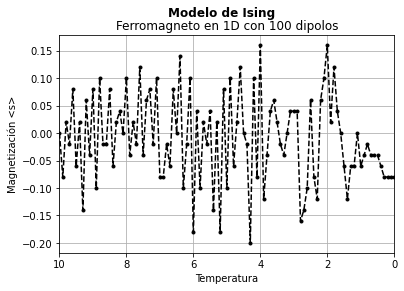

In [10]:
S_prom, T = Ising(100, 10)

fig, ax = plt.subplots()
fig.suptitle('Modelo de Ising',fontweight ="bold")
ax.set_title('Ferromagneto en 1D con 100 dipolos')
ax.set_ylabel('Magnetización <s>')
ax.set_xlabel('Temperatura')
ax.set_xlim(10,0)
ax.errorbar(x = T, y = S_prom, fmt='.--', color='black')
plt.grid()
plt.show()

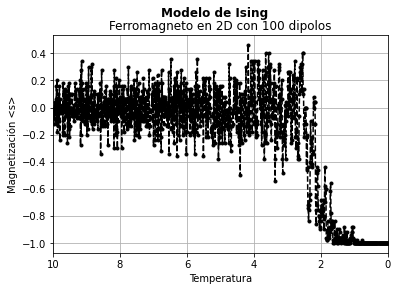

In [11]:
S_prom, T = Ising(10, 10, oneD= False)

fig, ax = plt.subplots()
fig.suptitle('Modelo de Ising',fontweight ="bold")
ax.set_title('Ferromagneto en 2D con 100 dipolos')
ax.set_ylabel('Magnetización <s>')
ax.set_xlabel('Temperatura')
ax.set_xlim(10,0)
ax.errorbar(x = T, y = S_prom, fmt='.--', color='black')
plt.grid()
plt.show()